In [19]:
''' Importing the necessary libraries'''
import pandas as pd
import numpy as np
import yfinance as yf
from dotenv import load_dotenv
import os
from datetime import datetime

# Importing the necessary libraries for data preprocessing
import ta
from ta import add_all_ta_features
from dataprep.eda import create_report

# Importing the necessary libraries for data visualization
import matplotlib.pyplot as plt
import plotly.express as px
from dataprep.eda import plot, plot_correlation, create_report
import seaborn as sns

In [20]:
# Load environment variables from .env file
load_dotenv()

# Import environment variables
start_date = os.getenv('start_date')
end_date = os.getenv('end_date')
btc_etf_start_date = os.getenv('btc_etf_start_date')
btc_etf_end_date = os.getenv('btc_etf_end_date')

In [21]:
# Fetch historical values for BTC-USD
btc_usd_data = yf.download('BTC-USD',
                       start=start_date,
                       end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [22]:
high = btc_usd_data.High
low = btc_usd_data.Low
close = btc_usd_data.Close
volume = btc_usd_data.Volume

In [23]:
# Add all ta features
btc_usd_data = add_all_ta_features(
    btc_usd_data, open="Open", high="High", low="Low", close="Close", volume="Volume")

# btc_usd_data.to_csv('btc_usd_data_tech_indicators.csv')

In [9]:
report = create_report(btc_usd_data, title='BTC Technical Analysis Report')

# report.save('btc_technical_analysis_report.html')


  0%|          | 0/30118 [00:00<?, ?it/s]

c:\Users\Stamatis\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
c:\Users\Stamatis\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [16]:
# for col in btc_usd_data.columns:
#     plt.plot(btc_usd_data[col])
#     plt.title(col)
#     plt.show()

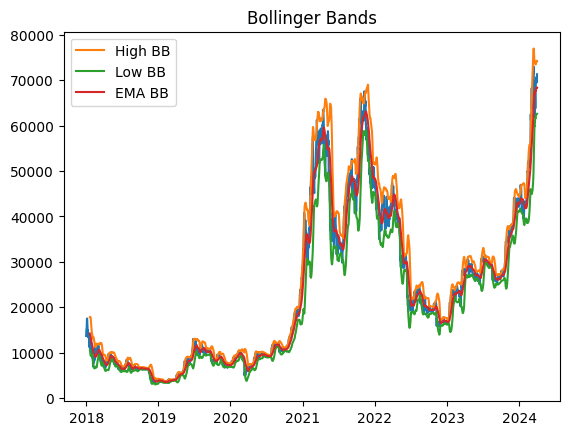

In [12]:
plt.plot(btc_usd_data.Close)
plt.plot(btc_usd_data.volatility_bbh, label='High BB')
plt.plot(btc_usd_data.volatility_bbl, label='Low BB')
plt.plot(btc_usd_data.volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()